In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
### mnist = tf.keras.datasets.fashion_mnist
mnist = tf.keras.datasets.mnist

### open cv 

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

In [29]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
len(xtest)

10000

In [20]:
xtrain.shape

(60000, 28, 28)

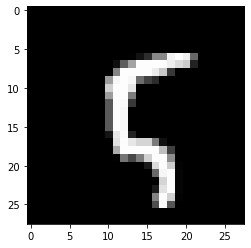

In [13]:
plt.imshow(xtrain[100],cmap='gray')
plt.show()

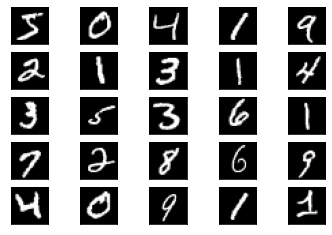

In [17]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtrain[i],cmap='gray')
plt.show()

In [0]:
#### Build Model
model = tf.keras.models.Sequential()

In [0]:
### Adding the layers
model.add(tf.keras.layers.Flatten())   ### input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))  ### hidden layer
model.add(tf.keras.layers.Dense(600,activation='relu'))  ### hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))   ### hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
#xtrain.shape[1] * xtrain.shape[2]

28

In [0]:
### Configure the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
#### Train the model
## model.fit(xtrain,ytrain,epochs=3,batch_size=20)
model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2043 - accuracy: 0.9364
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0913 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0606 - accuracy: 0.9807


In [0]:
##### Predictions
predictions = model.predict(xtest)

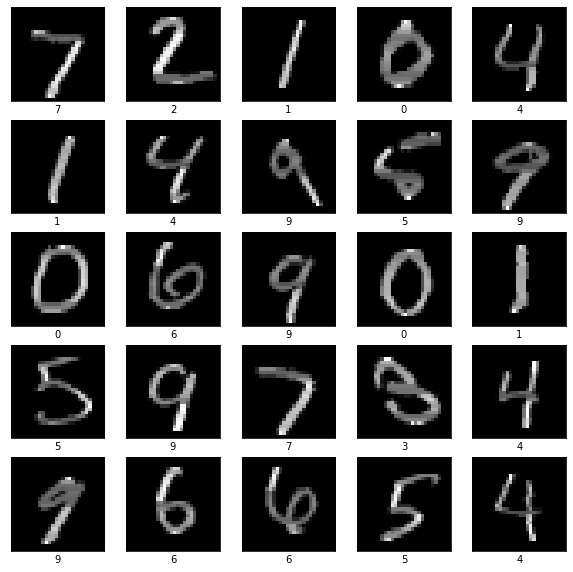

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(xtest[i],cmap='gray')
  plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [41]:
ytest[10]

0

In [45]:
np.argmax(predictions[20])

9

In [47]:
predictions[20]

array([1.2816015e-06, 5.3170729e-06, 6.6531226e-07, 7.3175947e-06,
       4.5037468e-05, 5.0679282e-06, 1.3671841e-08, 1.0129884e-04,
       1.1584583e-05, 9.9982244e-01], dtype=float32)

In [48]:
loss,accu = model.evaluate(xtest,ytest)
loss,accu

313/313 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9741


(0.09243782609701157, 0.9740999937057495)